In [1]:
cd ..

/Users/wonjunekang/Desktop/MAS.S62/project/conversation-quality


In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

import statsmodels.api as sm

## Load and normalize data

In [3]:
labels_csv = "./data/csv/keeper_survey_avg.csv"
labels_df = pd.read_csv(labels_csv).drop(['treatment', 'conversation'], axis=1)
labels_df

,ease,sp,anxiety,tone
0,3.500000,1.642857,2.500000,2.781250
1,3.166667,1.535714,2.000000,1.937500
2,4.000000,2.571429,2.500000,2.729167
3,2.666667,1.571429,2.416667,2.125000
4,3.000000,1.964286,2.125000,2.156250
5,2.777778,1.714286,1.833333,2.104167
6,2.777778,1.428571,1.666667,2.083333
7,2.000000,2.000000,1.800000,1.812500
8,1.833333,1.535714,1.500000,1.578125
9,3.166667,1.428571,2.000000,1.875000


In [4]:
labels_scaler = StandardScaler()
labels_scaled = labels_scaler.fit_transform(labels_df)
labels_scaled

array([[ 1.12053573, -0.56717128,  1.07123636,  1.88564877],
       [ 0.5440249 , -0.88005912, -0.24495848, -0.83095033],
       [ 1.98530198,  2.14452329,  1.07123636,  1.71795747],
       [-0.32074134, -0.77576317,  0.85187055, -0.22726164],
       [ 0.25576949,  0.37149222,  0.08409023, -0.12664686],
       [-0.12857107, -0.35857939, -0.6836901 , -0.29433816],
       [-0.12857107, -1.19294695, -1.12242171, -0.36141469],
       [-1.47376301,  0.47578817, -0.77143642, -1.23340946],
       [-1.76201842, -0.88005912, -1.56115333, -1.98802032],
       [ 0.5440249 , -1.19294695, -0.24495848, -1.0321799 ],
       [ 0.64011004, -1.749192  ,  1.94869959,  0.17519748],
       [-0.75312447, -0.25428345,  1.56480943,  0.72857878],
       [-1.28159273,  1.31015573, -0.6836901 ,  0.10812096],
       [ 0.64011004,  0.89297195,  0.74218765,  1.75149573],
       [ 1.50487629,  0.47578817,  0.85187055,  1.14780704],
       [ 1.12053573,  0.05860439,  0.41313894, -0.62972077],
       [-0.03248593,  1.

In [5]:
drop_feats=["Conversation ID", "Mean inter-speaker silence", "Interruption rate"]

data_full_csv = "./data/csv/keeper_metrics_full.csv"
data_part2_csv = "./data/csv/keeper_metrics_part2.csv"
data_full_df = pd.read_csv(data_full_csv, delimiter='\t').drop(drop_feats, axis=1)
data_part2_df = pd.read_csv(data_part2_csv, delimiter='\t').drop(drop_feats, axis=1)

In [6]:
data_full_df

,Words per hour,Speech per turn,Turn taking balance,Grade level,MATTR lexical diversity,Mean word length,VADER sentiment,Responsivity rate
0,6373.99,9.02,0.966,2.61,444,4.28,0.299,0.152
1,6493.69,9.42,0.959,3.08,406,4.33,0.294,0.197
2,5119.84,8.54,0.938,2.55,374,4.30,0.262,0.132
3,7828.87,5.62,0.983,0.96,446,4.22,0.185,0.137
4,6318.28,8.19,0.956,1.41,407,4.23,0.233,0.211
5,7501.94,7.71,0.975,1.97,425,4.25,0.265,0.226
6,10473.77,7.62,0.877,3.81,440,4.28,0.274,0.081
7,11367.38,6.00,0.873,3.03,439,4.22,0.204,0.089
8,9562.37,9.58,0.857,3.61,418,4.21,0.247,0.082
9,6191.68,6.60,0.990,1.58,416,4.31,0.272,0.086


In [7]:
data_full_scaler = StandardScaler()
data_full_scaled = data_full_scaler.fit_transform(data_full_df)
data_full_scaled.shape

(21, 8)

In [8]:
data_part2_scaler = StandardScaler()
data_part2_scaled = data_part2_scaler.fit_transform(data_part2_df)
data_part2_scaled.shape

(21, 8)

## Plot histograms for labels

In [9]:
ease_np = labels_df['ease'].to_numpy()
sp_np = labels_df['sp'].to_numpy()
anxiety_np = labels_df['anxiety'].to_numpy()
tone_np = labels_df['tone'].to_numpy()

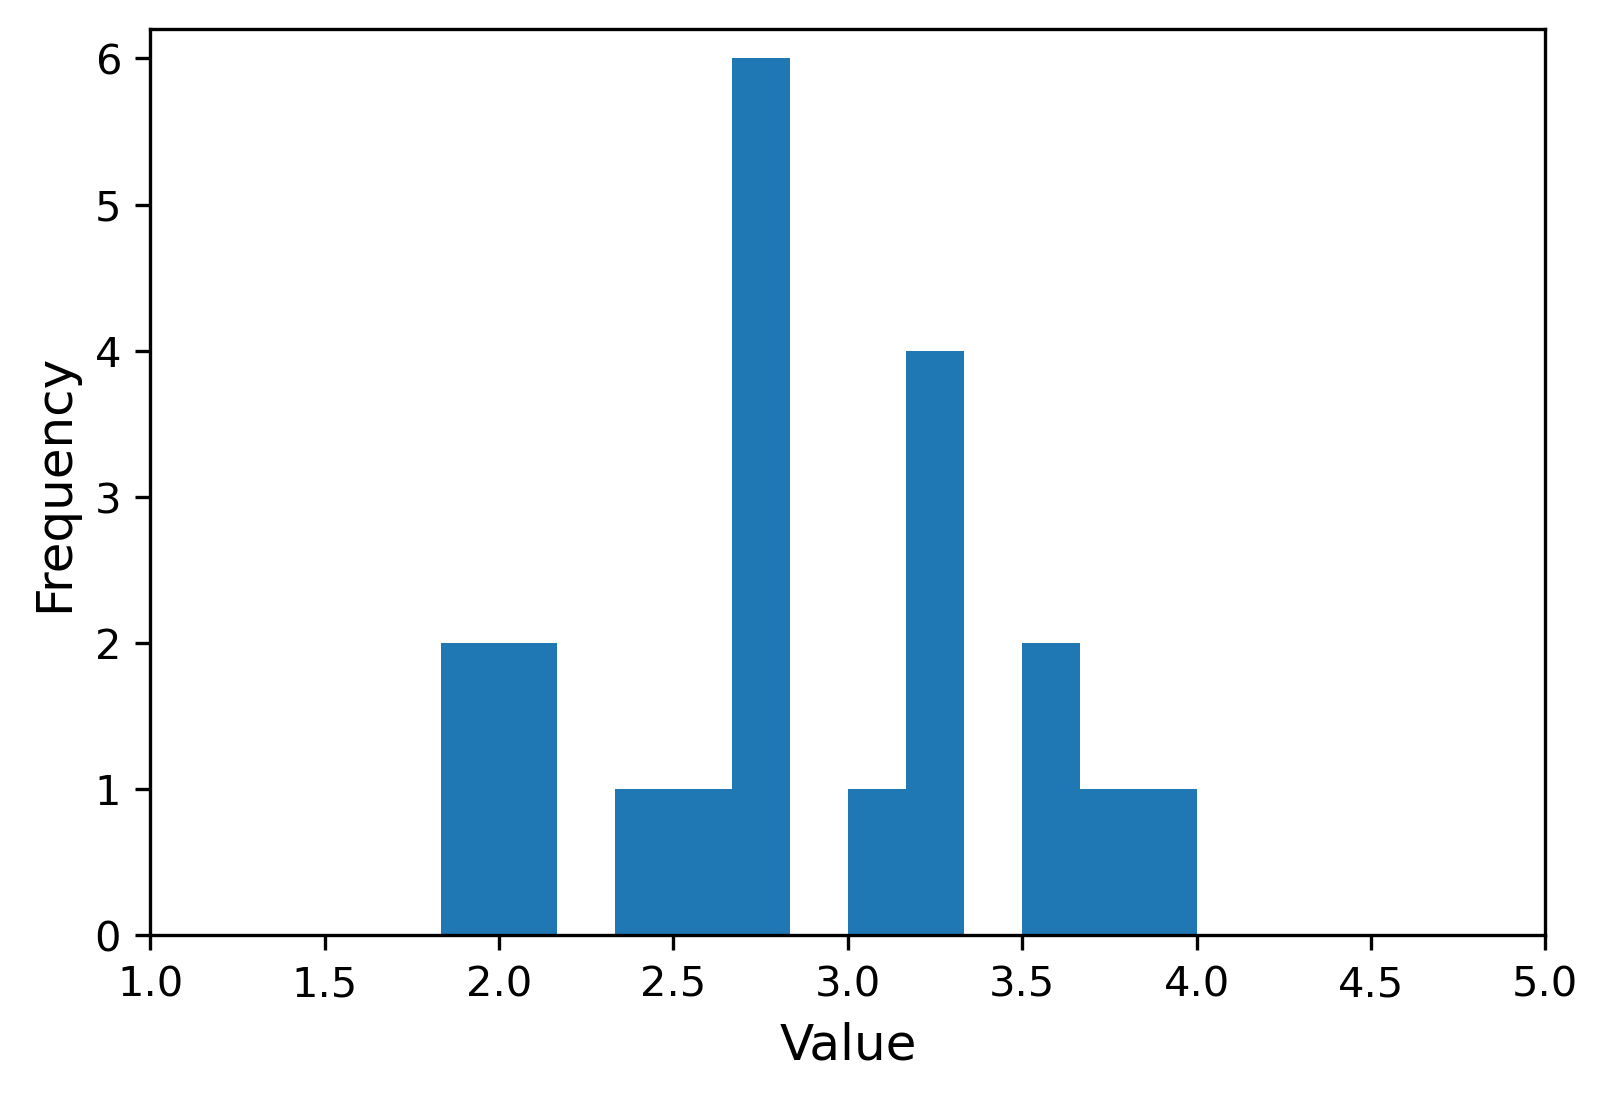

In [38]:
# ease
plt.figure(dpi=300)
plt.hist(ease_np, bins=13)
plt.xlim(1, 5)
plt.ylim(0, 6.2)
plt.xlabel('Value', size='large')
plt.ylabel('Frequency', size='large')
plt.show()

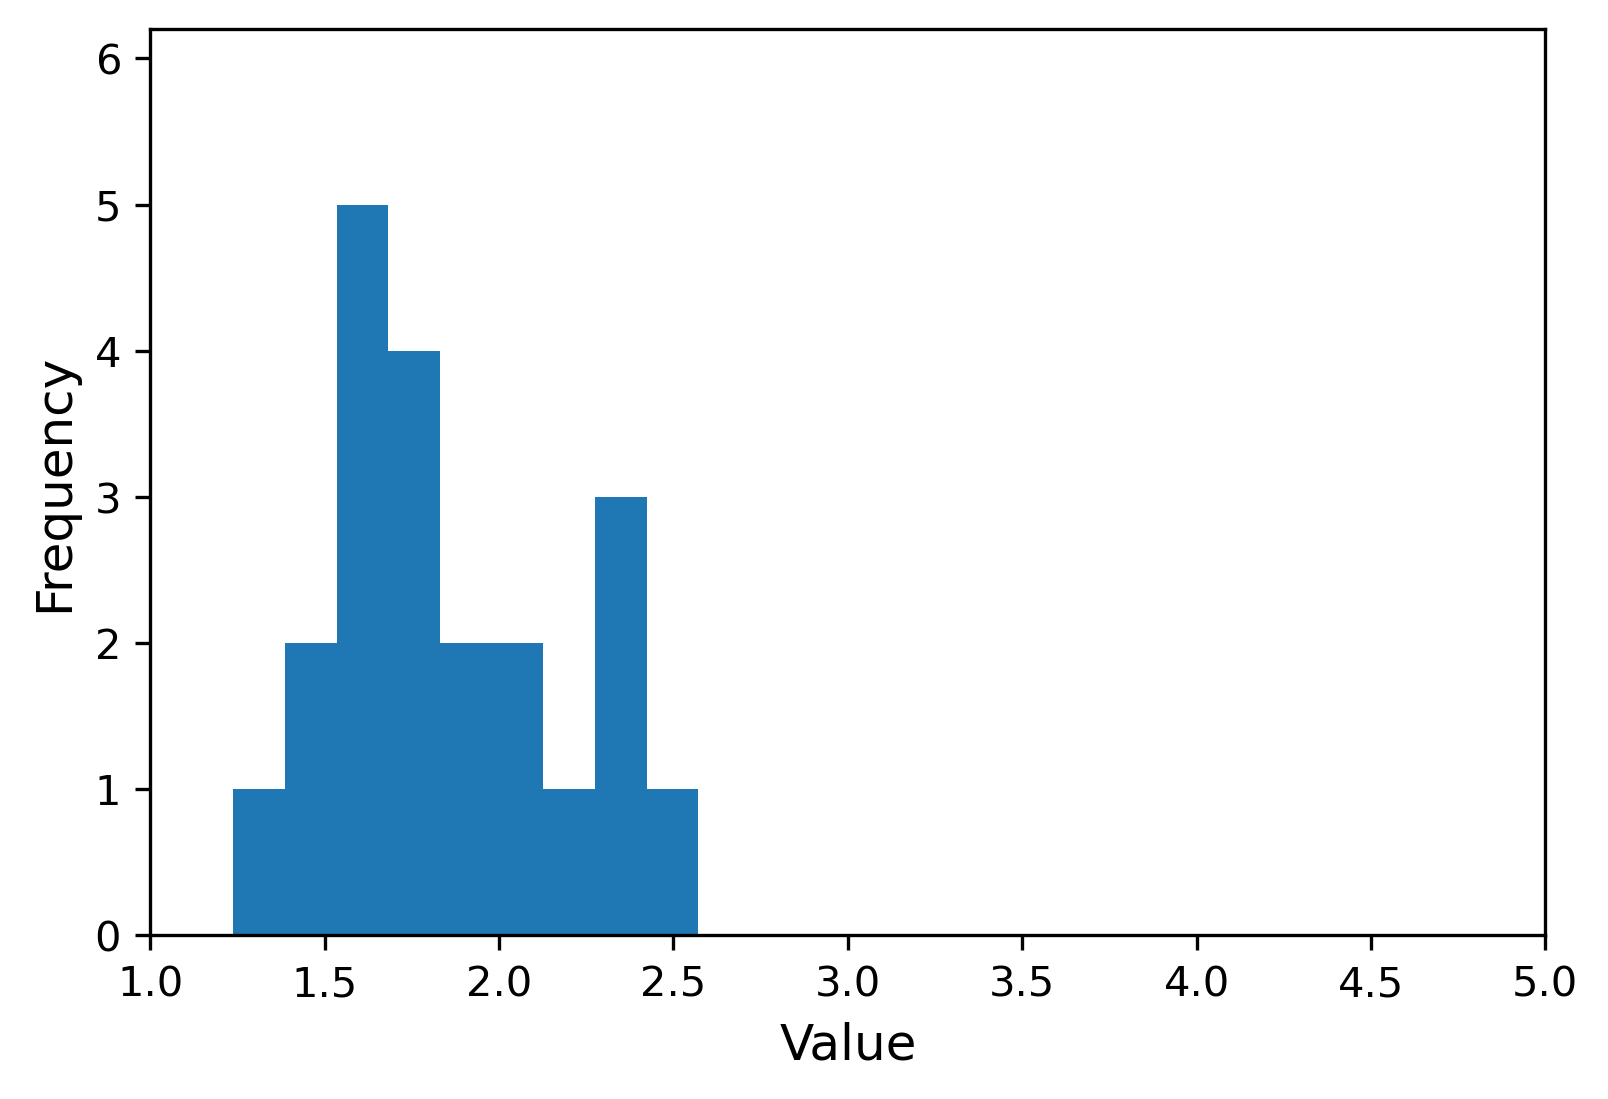

In [39]:
# social presence
plt.figure(dpi=300)
plt.hist(sp_np, bins=9)
plt.xlim(1, 5)
plt.ylim(0, 6.2)
plt.xlabel('Value', size='large')
plt.ylabel('Frequency', size='large')
plt.show()

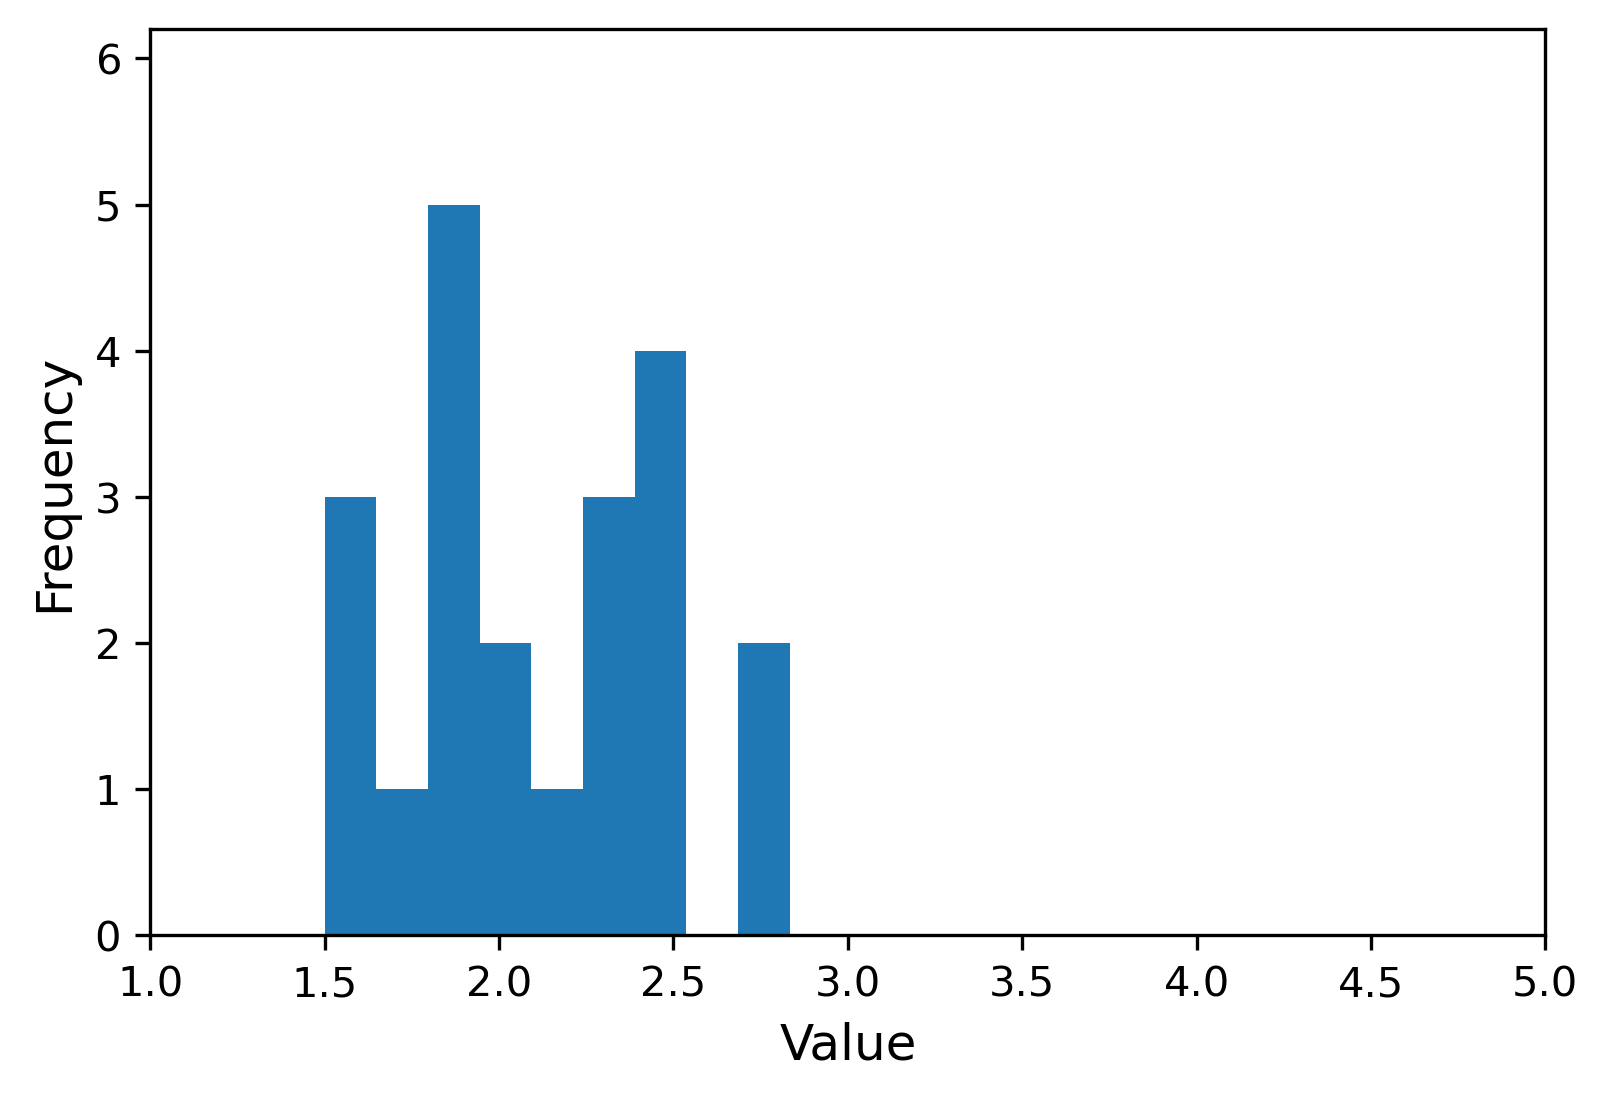

In [40]:
# anxiety
plt.figure(dpi=300)
plt.hist(anxiety_np, bins=9)
plt.xlim(1, 5)
plt.ylim(0, 6.2)
plt.xlabel('Value', size='large')
plt.ylabel('Frequency', size='large')
plt.show()

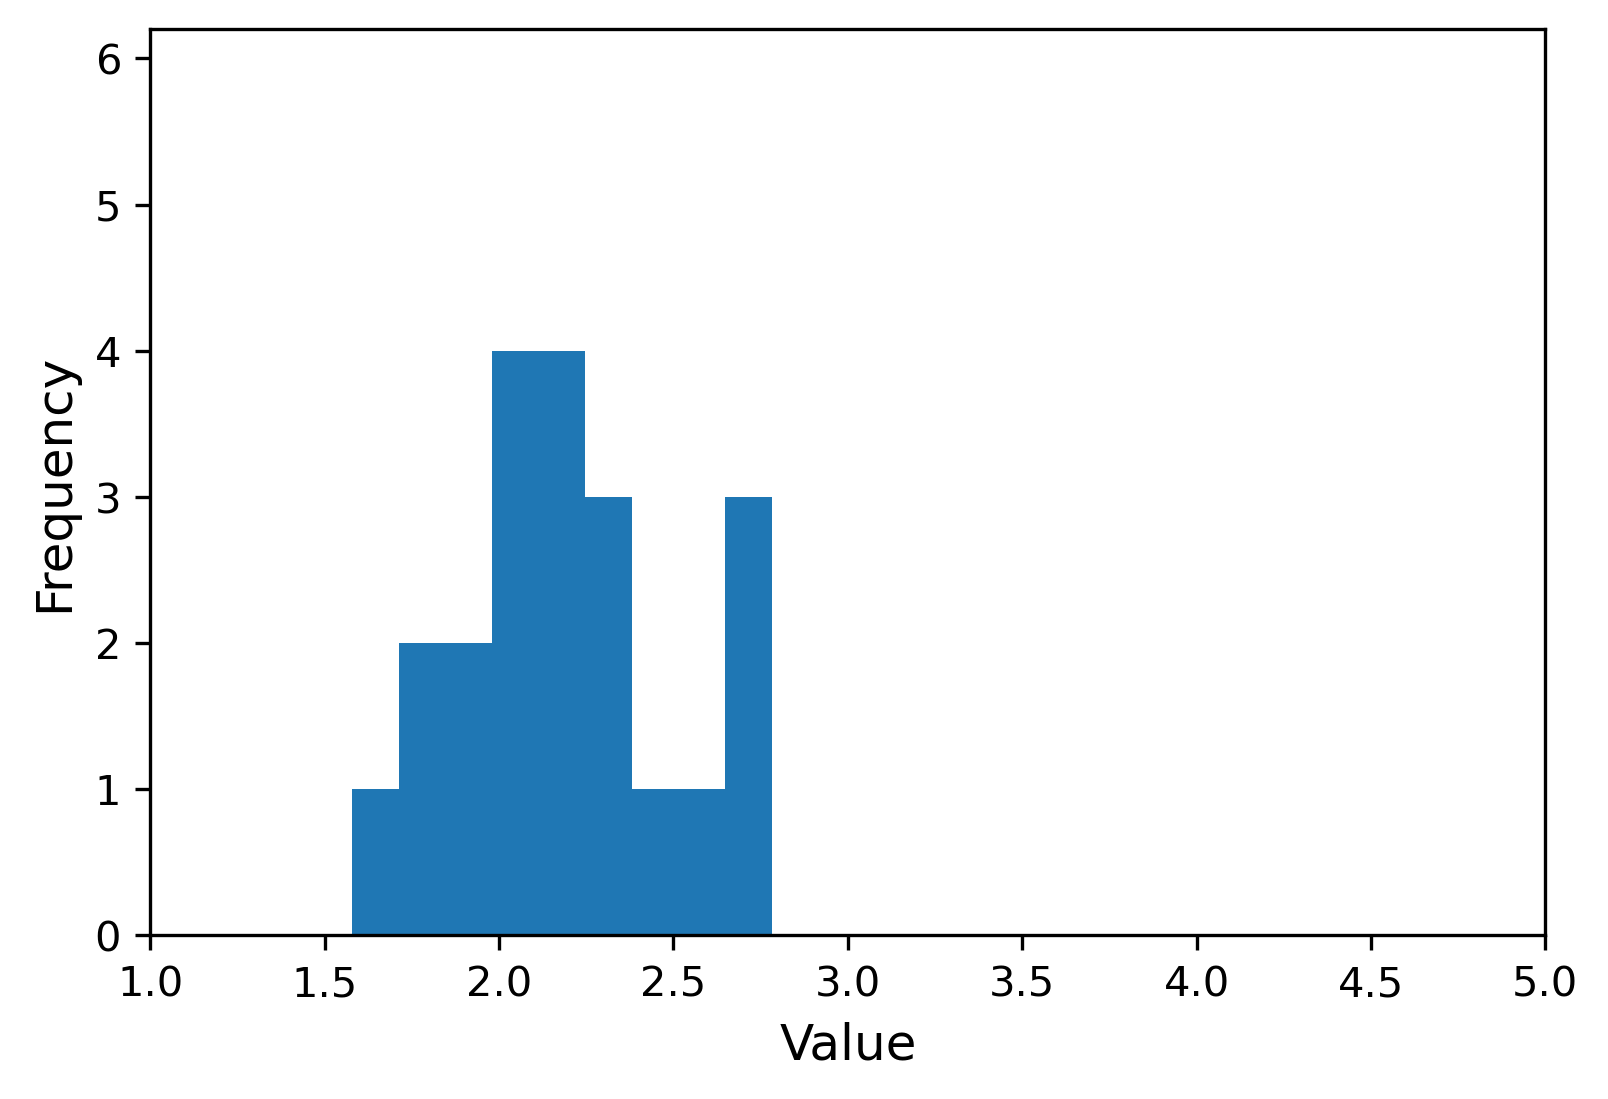

In [44]:
# tone
plt.figure(dpi=300)
plt.hist(tone_np, bins=9)
plt.xlim(1, 5)
plt.ylim(0, 6.2)
plt.xlabel('Value', size='large')
plt.ylabel('Frequency', size='large')
plt.show()

## OLS for full Keeper conversations

In [13]:
ease_scaled = labels_scaled[:,0].reshape(-1, 1)
sp_scaled = labels_scaled[:,1].reshape(-1, 1)
anxiety_scaled = labels_scaled[:,2].reshape(-1, 1)
tone_scaled = labels_scaled[:,3].reshape(-1, 1)

In [14]:
# ease
X2 = sm.add_constant(data_full_scaled)
est = sm.OLS(ease_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.334
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.315
Time:                        10:30:16   Log-Likelihood:                -23.119
No. Observations:                  21   AIC:                             64.24
Df Residuals:                      12   BIC:                             73.64
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.476e-16      0.210   2.13e-15      1.0

In [15]:
# social presence
X2 = sm.add_constant(data_full_scaled)
est = sm.OLS(sp_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9855
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.491
Time:                        10:31:01   Log-Likelihood:                -24.495
No. Observations:                  21   AIC:                             66.99
Df Residuals:                      12   BIC:                             76.39
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.233e-16      0.224  -1.89e-15      1.0

In [16]:
# anxiety
X2 = sm.add_constant(data_full_scaled)
est = sm.OLS(anxiety_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                 -0.113
Method:                 Least Squares   F-statistic:                    0.7462
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.653
Time:                        10:31:04   Log-Likelihood:                -25.558
No. Observations:                  21   AIC:                             69.12
Df Residuals:                      12   BIC:                             78.52
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.523e-16      0.236   2.76e-15      1.0

In [17]:
# tone
X2 = sm.add_constant(data_full_scaled)
est = sm.OLS(tone_scaled, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                 -0.052
Method:                 Least Squares   F-statistic:                    0.8768
Date:                Wed, 16 Dec 2020   Prob (F-statistic):              0.561
Time:                        10:31:08   Log-Likelihood:                -24.965
No. Observations:                  21   AIC:                             67.93
Df Residuals:                      12   BIC:                             77.33
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.426e-16      0.229  -1.49e-15      1.0

## OLS for part 2 of Keeper conversations

In [25]:
# ease
X2 = sm.add_constant(data_part2_scaled)
est = sm.OLS(ease_np, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.8967
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.548
Time:                        18:41:32   Log-Likelihood:                -13.372
No. Observations:                  21   AIC:                             44.74
Df Residuals:                      12   BIC:                             54.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8521      0.132     21.600      0.0

In [26]:
# social presence
X2 = sm.add_constant(data_part2_scaled)
est = sm.OLS(sp_np, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                 -0.192
Method:                 Least Squares   F-statistic:                    0.5979
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.763
Time:                        18:41:38   Log-Likelihood:                -3.7701
No. Observations:                  21   AIC:                             25.54
Df Residuals:                      12   BIC:                             34.94
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8371      0.084     21.978      0.0

In [27]:
# anxiety
X2 = sm.add_constant(data_part2_scaled)
est = sm.OLS(anxiety_np, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                 -0.106
Method:                 Least Squares   F-statistic:                    0.7597
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.643
Time:                        18:41:40   Log-Likelihood:                -5.1694
No. Observations:                  21   AIC:                             28.34
Df Residuals:                      12   BIC:                             37.74
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0931      0.089     23.426      0.0

In [28]:
# anxiety
X2 = sm.add_constant(data_part2_scaled)
est = sm.OLS(tone_np, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.9442
Date:                Sun, 13 Dec 2020   Prob (F-statistic):              0.517
Time:                        18:41:43   Log-Likelihood:               -0.11631
No. Observations:                  21   AIC:                             18.23
Df Residuals:                      12   BIC:                             27.63
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1956      0.070     31.259      0.0